In [338]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt 

#Import data
train = pd.read_csv("D:\Digit_recognizer\digit-recognizer/train.csv")
test = pd.read_csv("D:\Digit_recognizer\digit-recognizer/test.csv")

In [339]:
#Prepare X and Y from train data
X=train.drop(["label"],axis = 1)
Y=train.label

#Check train and test data for null
X.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [340]:
#Split train set into train and test
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.20,random_state=1)
#Need to convert train_x and train_y into np arrays. As model only accepts numpy arrays
train_x = train_x.values
train_y = train_y.values
test_x  = test_x.values
test_y  = test_y.values

In [341]:
#Normalize data (to reduce grayscale 0-255 illumination differences)
train_x=train_x/255.0
test_x=test_x/255.0
test=test/255.0

In [351]:
#Configure model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dense(10,activation=tf.nn.softmax)) 
model.compile(metrics=['accuracy'], optimizer='adam',loss='sparse_categorical_crossentropy') 

In [360]:
#Fit training data to the model
history=model.fit(train_x,train_y,epochs=13)

Epoch 1/13
33600/33600 [==============================] - 3s 95us/sample - loss: 0.3243 - acc: 0.9077
Epoch 2/13
33600/33600 [==============================] - 3s 86us/sample - loss: 0.1470 - acc: 0.9573
Epoch 3/13
33600/33600 [==============================] - 3s 83us/sample - loss: 0.1021 - acc: 0.9690
Epoch 4/13
33600/33600 [==============================] - 3s 83us/sample - loss: 0.0735 - acc: 0.9786
Epoch 5/13
33600/33600 [==============================] - 3s 84us/sample - loss: 0.0556 - acc: 0.9833
Epoch 6/13
33600/33600 [==============================] - 3s 81us/sample - loss: 0.0446 - acc: 0.9872
Epoch 7/13
33600/33600 [==============================] - 3s 86us/sample - loss: 0.0323 - acc: 0.9908
Epoch 8/13
33600/33600 [==============================] - 3s 86us/sample - loss: 0.0253 - acc: 0.9929
Epoch 9/13
33600/33600 [==============================] - 3s 83us/sample - loss: 0.0221 - acc: 0.9935
Epoch 10/13
33600/33600 [==============================] - 3s 85us/sample - loss: 

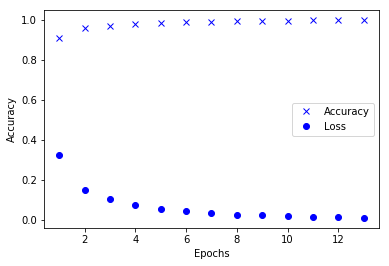

In [361]:
#Calc epochs efficiency:
loss = history.history['loss']
acc = history.history['acc']

epochs = range(1,len(loss)+1)
plt.plot(epochs,acc,'bx',label='Accuracy')
plt.plot(epochs,loss,'bo',label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [362]:
#Calc loss and accuracy on test(train-test) data:
test_loss,test_acc = model.evaluate(test_x, test_y)

8400/8400 [==============================] - 0s 42us/sample - loss: 0.1068 - acc: 0.9720


In [363]:
#Try test index predict vs actual
predictions  = model.predict(test_x)
idx = 34
print('Probability distribution:')
print(predictions[idx])
print('Predicted value:')
print(np.argmax(predictions[idx]))
print('Actual value:')
print(test_y[idx])

Probability distribution:
[4.5187935e-05 1.7864496e-11 1.2213456e-04 1.5347742e-09 9.4449870e-16
 9.7107375e-01 2.8713290e-02 2.0726248e-12 4.5781071e-05 1.3783958e-11]
Predicted value:
5
Actual value:
5


In [364]:
#Fail to predict correctly:
num_rows = test_x.shape[0]
predictions_label=[]     #convert predictions to labels
incorrect_predict_digit = [] 
incorrect_actual_digit = [] 
err_indx=[]
for i in range(num_rows):
    predicted_value = np.argmax(predictions[i])
    predictions_label.append(np.argmax(predictions[i]))
    actual_value = test_y[i]
    if predicted_value != actual_value:
        incorrect_predict_digit.append(predicted_value)
        incorrect_actual_digit.append(actual_value)
        err_indx.append(i)
        
#Show few incorrect pictures:



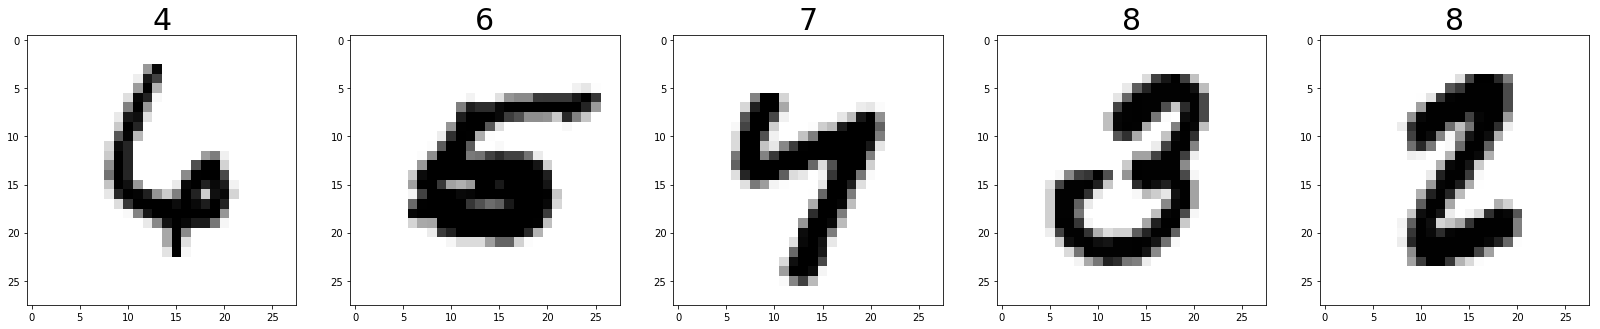

In [365]:
#First 5 wrong predictions:
plt.figure(figsize=(28,28))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.grid(False)
    plt.imshow(test_x[err_indx[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.title(predictions_label[err_indx[i]],fontsize= 30)
plt.show()

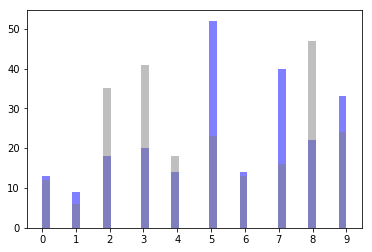

In [366]:
#Histogram fails predict vs actual:
plt.hist(incorrect_predict_digit,bins=40,color='blue', alpha=0.5)
plt.hist(incorrect_actual_digit,bins=40,color='gray', alpha=0.5)
plt.xticks(np.arange(10), range(10))
plt.show()

[[841   0   4   0   0   0   4   0   1   3]
 [  0 936   2   1   0   0   1   0   0   0]
 [  1   2 820   3   0   0   0   4   5   0]
 [  1   0   7 835   1  19   0   2   5   3]
 [  0   1   1   0 811   0   1   2   1  12]
 [  2   0   1   2   2 714   5   2   1   2]
 [  0   0   1   0   4   2 793   0   0   0]
 [  0   0   4   0   4   0   0 835   1   6]
 [  2   5   0   2   6  10   5   1 812   3]
 [  2   0   0   0   3   3   0   6   1 828]]


Text(95.305, 0.5, 'Actual')

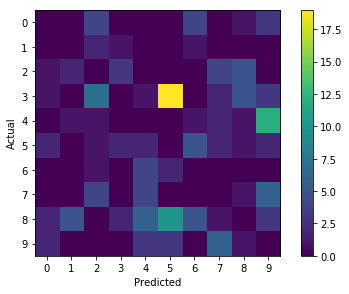

In [367]:
#Confusion matrix:
cm = confusion_matrix(test_y, prediction_label)
print(cm)

# Plot confusion matrix as an image:
for i in list(range(10)):
    cm[i,i] = 0   #remove corrects for clear view
plt.imshow(cm, interpolation='nearest', cmap='viridis')#cmap=plt.cm.Blues
plt.tight_layout()
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')